## Introduction to Geospatial Data
### Part 5 of 5
# Storing geography in the computer


## Reminder
<a href="#/slide-2-0" class="navigate-right" style="background-color:blue;color:white;padding:8px;margin:2px;font-weight:bold;">Continue with the lesson</a>

<font size="+1">

By continuing with this lesson you are granting your permission to take part in this research study for the Hour of Cyberinfrastructure: Developing Cyber Literacy for GIScience project. In this study, you will be learning about cyberinfrastructure and related concepts using a web-based platform that will take approximately one hour per lesson. Participation in this study is voluntary.

Participants in this research must be 18 years or older. If you are under the age of 18 then please exit this webpage or navigate to another website such as the Hour of Code at https://hourofcode.com, which is designed for K-12 students.

If you are not interested in participating please exit the browser or navigate to this website: http://www.umn.edu. Your participation is voluntary and you are free to stop the lesson at any time.

For the full description please navigate to this website: <a href="gateway-1.ipynb">Gateway Lesson Research Study Permission</a>.

</font>

In [12]:
# This code cell starts the necessary setup for Hour of CI lesson notebooks.
# First, it enables users to hide and unhide code by producing a 'Toggle raw code' button below.
# Second, it imports the hourofci package, which is necessary for lessons and interactive Jupyter Widgets.
# Third, it helps hide/control other aspects of Jupyter Notebooks to improve the user experience
# This is an initialization cell
# It is not displayed because the Slide Type is 'Skip'

from IPython.display import HTML, IFrame, Javascript, display
from ipywidgets import interactive
import ipywidgets as widgets
from ipywidgets import Layout

import getpass # This library allows us to get the username (User agent string)

# import package for hourofci project
import sys
sys.path.append('../../supplementary') # relative path (may change depending on the location of the lesson notebook)
import hourofci

# load javascript to initialize/hide cells, get user agent string, and hide output indicator
# hide code by introducing a toggle button "Toggle raw code"
HTML(''' 
    <script type="text/javascript" src=\"../../supplementary/js/custom.js\"></script>
    
    <style>
        .output_prompt{opacity:0;}
    </style>
    
    <input id="toggle_code" type="button" value="Toggle raw code">
''')

## The world is infinitely complex
<table>
    <tr style="background: #fff">
        <td width=50%> <img src='supplementary/queenstown.jpg' alt='Picture of Queenstown, New Zealand'></td>
        <td align=left valign=top>This is a photo looking down towards the SE on the mountain resort town of Queenstown, New Zealand (at 45.03 N lat, 168.66 E long).<br><br>
            How many different kinds of things do you see here?
            <br><br>
            How can we decide what to measure and record?
            <br><br>
            And how can we structure data about this complex world into tables to represent this?????</td>
    </tr>
</table>

## A famous GIScientist once said
<i>"People cultivate fields (but manipulate objects)"</i> <small>**</small></p>
This phrase summarizes the most important distinction we make when capturing geospatial data --
<table>
    <tr style="background: #fff">
        <td width=40%> <img src='supplementary/raster_vector.png' alt='Raster or vector?'></td>
        <td align=left valign=top><b><u>Is the world made up of <i>fields</i> or <i>objects</i>?</u></b></td>
    </tr>
</table>
<small>** by Helen Couclelis, 1992, <a href="https://www.researchgate.net/publication/221589734_People_Manipulate_Objects_but_Cultivate_Fields_Beyond_the_Raster-Vector_Debate_in_GIS">"People Manipulate Objects (but Cultivate Fields): Beyond the Raster-Vector Debate in GIS"</a> from the book *Theories and Methods of Spatio-Temporal Reasoning in Geographic Space: International Conference GIS — From Space to Territory: Theories and Methods of Spatio-Temporal Reasoning* Pisa, Italy, September 21–23, 1992 (pp.65-77)</small>

Think about the picture of Queenstown we looked at earlier. 
 
The rolling surface of the landscape is continuous. There's land or water, at various elevations, everywhere. That's a *field*. Elevation is the classic field. There is a value of elevation everywhere. 

Then consider all the manmade structures in the picture. There are buildings, lightposts, roads. These are *objects*. The object world view is mostly empty, with objects scattered around. 

So, let's see if you can separate these two perspectives.

{{IFrame("supplementary/sort-field-object.html", width=970, height=530)}}

<center><large>Now let's look at some geospatial data that are coded as either objects or fields.

Starting with field data, here is a file of elevation measurements in the area to the south of Queenstown which is located near the center top of the image. You can see the lakes in the pale grey color.

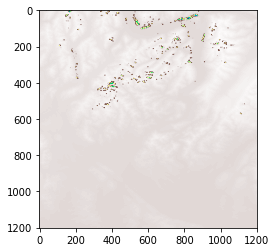

In [2]:
import rasterio
from matplotlib import pyplot
filepath = 'https://dds.cr.usgs.gov/srtm/version1/Islands/S46E168.hgt.zip'
raster = rasterio.open(filepath, 'r')
pyplot.imshow(raster.read(1), cmap='terrain')
pyplot.show()

Now we can look at how the field data is actually stored.

In [3]:
raster.read()

array([[[ 398,  388,  382, ...,  983,  999, 1014],
        [ 401,  387,  379, ...,  955,  976,  992],
        [ 395,  384,  375, ...,  934,  952,  969],
        ...,
        [ 149,  142,  137, ...,  164,  163,  162],
        [ 165,  150,  145, ...,  159,  160,  160],
        [ 171,  158,  158, ...,  153,  151,  153]]], dtype=int16)

What we're seeing here is the beginning and end of the first three and last three lines of the file. What's all this???

Field data is usually stored as *rasters*.

To store the world into a raster, the surface of the earth is divided into a grid of equal sized cells that covers a specific chunk of the earth, say a square that is 10 m by 10 m. 

<table>
    <tr style="background: #fff">
        <td width=40%> <img src='supplementary/world_to_raster_sm.png' alt='World to raster'></td>
        <td align=left valign=top>Each cell is given a value that represents the data that has been measured on the earth in that cell.<br><br>
            In the raster in this graphic, the building has been coded with the value green and the road has been coded with the value red.
        </td>
    </tr>
</table>

So, let's look again at that field data. Run both of these code chunks.

In [5]:
print("The Raster is", raster.width, "cells wide and", raster.height, "cells high")

The Raster is 1201 cells wide and 1201 cells high


In [6]:
raster.bounds

BoundingBox(left=167.99958333333333, bottom=-46.000416666666666, right=169.00041666666667, top=-44.999583333333334)

These show us that the NW (top left) corner of the area covered is 45 S latitude and 168 E longitude and the area covered is 1 degree of latitude high and 1 degree of longitude wide. Since 1 degree is 3600 seconds, this means the cell dimensions are 3 arc seconds of a degree (that's approx 100m wide and 300m high at this latitude). <large><i>ERIC!! Is this correct???</i></large>

Each row in the file shows us the average elevation value (in meters) in each cell across a row of the grid. Run this code to see the file again.

In [7]:
raster.read()

array([[[ 398,  388,  382, ...,  983,  999, 1014],
        [ 401,  387,  379, ...,  955,  976,  992],
        [ 395,  384,  375, ...,  934,  952,  969],
        ...,
        [ 149,  142,  137, ...,  164,  163,  162],
        [ 165,  150,  145, ...,  159,  160,  160],
        [ 171,  158,  158, ...,  153,  151,  153]]], dtype=int16)

Note that the elevations are much higher in the NE corner (as evidenced by the high values at the end of the first few rows) and lower along the southern edge (shown in the final rows). 

Now let's look at how object data is stored - hint, it's completely different! And WAY more complex. 

We'll start simple. When you ask Google to show you all the nearby restaurants on a map, you get a map with a bunch of pins, some with labels. You can click on them and find out information about those places. Those dots represent restaurant objects.

For example...

Here's a map of Queenstown showing some points of interest. Now we're looking north and the camera point for the photo used earlier is the cleared area at the top of the hill on the left.

<a href="https://www.google.com/maps/place/Queenstown,+New+Zealand/@-45.0514839,168.6648181,1609a,35y,345.22h,54.63t/data=!3m1!1e3!4m5!3m4!1s0xa9d51df1d7a8de5f:0x500ef868479a600!8m2!3d-45.0301511!4d168.6616206">This link will take you to this map live in Google Maps.</a>
![Queenstown POIs](supplementary/queenstown_google_POI.png)


Now, let's see how that data is stored in a file. In Try-it Exercise #1 you looked at a point dataset. Remember this? (click the arrow to the left of the code)

In [8]:
import geopandas
#cities = geopandas.read_file("https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/cultural/ne_110m_populated_places.zip")
cities = geopandas.read_file("https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/50m/cultural/ne_50m_populated_places_simple.zip")
cities.head()

,scalerank,natscale,labelrank,featurecla,name,namepar,namealt,diffascii,nameascii,adm0cap,...,rank_max,rank_min,geonameid,meganame,ls_name,ls_match,checkme,min_zoom,ne_id,geometry
0,10,1,5,Admin-1 region capital,Bombo,None,None,0,Bombo,0.0,...,8,7,0.0,None,None,0,0,7.0,1159113923,POINT (32.53330 0.58330)
1,10,1,5,Admin-1 region capital,Fort Portal,None,None,0,Fort Portal,0.0,...,7,7,233476.0,None,None,0,0,7.0,1159113959,POINT (30.27500 0.67100)
2,10,1,3,Admin-1 region capital,Potenza,None,None,0,Potenza,0.0,...,8,8,3170027.0,None,None,0,0,7.0,1159117259,POINT (15.79900 40.64200)
3,10,1,3,Admin-1 region capital,Campobasso,None,None,0,Campobasso,0.0,...,8,8,3180991.0,None,None,0,0,7.0,1159117283,POINT (14.65600 41.56300)
4,10,1,3,Admin-1 region capital,Aosta,None,None,0,Aosta,0.0,...,7,7,3182997.0,None,None,0,0,7.0,1159117361,POINT (7.31500 45.73700)


In the table we just generated, each row has 
- an object ID
- some data about various attributes for that object
- then a column with an entry that is the point location 

Click back one slide to check this out. 

Now let's see again how that table can generate the dots on a map...

In [9]:
from ipyleaflet import Map, GeoData
cities_layer= GeoData(geo_dataframe = cities)
mymap = Map(center=(-43,168), zoom = 5)
mymap.add_layer(cities_layer)
mymap

Map(center=[-43, 168], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

OK, let's get back to fields and objects and how we put them into the computer. Remember this? 

<table>
    <tr style="background: #fff">
        <td width=40%> <img src='supplementary/raster_vector.png' alt='Raster or vector'></td>
        <td align=left valign=top>These two graphics show the two most common <i><u>data models</u></i> for geospatial data.<br><br> 
            Fields are stored as grids called <i>rasters</i> and there is a value everywhere. <br><br> 
            Objects, which are scattered around mostly empty space, are stored as <i>vectors</i>.<br><br><br> 
            So, tell me more about vectors, you say...</td>
    </tr>
</table>

Vectors usually come in three varieties - points, lines and polygons. 
<table>
    <tr style="background: #fff">
        <td width=30%> <img src='supplementary/vectors_sm.png' alt='Raster or vector'></td>
        <td align=left valign=top>Points are good for things like cities on a world map, or lightpoles and signposts on a neighborhood map.<br><br> 
            Lines are for rivers, roads, railways, boundaries - that sort of thing.<br><br> 
            Polygons are areas. So they're used for lakes, building footprints, parks.</td>
    </tr>
</table>

Vector data has two components.
<table>
    <tr style="background: #fff">
        <td width=40%> <img src='supplementary/vector_structure.png' alt='Vector structure'></td>
        <td align=left valign=top>These components can be stored together in a table by including one or more columns that provide the direct georeference (e.g. lat and long).<br><br>
            <i>OR</i>, these components can be stored separately. Attributes with an object ID in one table and the geometry labelled with the same IDs in a separate file. </td>
    </tr>
</table>

By the way, it's important to know that you can't mix up points, lines and polygons in a single geospatial data file. If you want a map that shows points, lines and polygons, then you'll need at least three different datasets, one for each type of vector object.

Remember the rivers data in our Try-it Exercise #1? Let's add it to the map. 

First, we'll get it again, just in case it's not currently loaded. (click the arrow to the left)

In [10]:
rivers = geopandas.read_file("https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/physical/ne_10m_rivers_lake_centerlines.zip")
rivers_layer = GeoData(geo_dataframe = rivers, style={'color':'blue'})

(wait for the asterisk to turn into a number...) then go to the next slide and we'll add it to the cities data...

In [11]:
mymap2 = Map(center=(-43,168), zoom = 5)
mymap2.add_layer(cities_layer)
mymap2.add_layer(rivers_layer)
mymap2

Map(center=[-43, 168], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

OK, now let's practice these concepts. For each of the following kinds of geospatial data, choose the data model (raster or vector) that it's most likely to be stored in.<p> 

{{IFrame("supplementary/sort-raster-vector.html", width=970, height=430)}}

Well done! Now you know a little bit about geospatial data. 

If you have worked through this lesson carefully, you should now be able to: 
1. Explain what is special about geospatial data.
2. Describe how location can be measured and recorded in geospatial data.
3. Explain the difference between raster and vector data.
4. Identify several different types of geospatial data.
5. Load and view different kinds of geospatial data in Python Notebooks.

If you still have time, feel free to go back to the two Try-It exercises and try out downloading some different datasets from the sources. Make maps of different parts of the earth or of different days from the Johns Hopkins data server. 

If you want to learn more about geospatial data, you can go on to the intermediate Geospatial Data lesson.

Or you can go back and complete some of the other introductory lessons as they all touch on the use of geospatial data. 